In [1]:
#problem1
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# Set column names
column_names = [
    'mpg', 'cylinders', 'displacement', 'horsepower',
    'weight', 'acceleration', 'model_year', 'origin', 'car_name'
]

# Load the data file, convert '?' to NaN
df = pd.read_csv('auto-mpg.data', names=column_names, delim_whitespace=True, na_values='?')

# Use only continuous features
features = df[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']]

# Impute missing values with the mean
features = features.fillna(features.mean())

# Perform hierarchical clustering (average linkage, Euclidean distance, 3 clusters)
model = AgglomerativeClustering(n_clusters=3, linkage='average', metric='euclidean')
labels = model.fit_predict(features)

# Add cluster labels to the original DataFrame
df['cluster'] = labels

# Calculate mean and variance for each cluster
cluster_stats = df.groupby('cluster')[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']].agg(['mean', 'var'])

# Calculate mean and variance for each origin category
origin_stats = df.groupby('origin')[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']].agg(['mean', 'var'])

# Create a cross-tabulation of cluster vs. origin
cross_tab = pd.crosstab(df['cluster'], df['origin'])

# Output the results
print("Mean and variance for each cluster:\n", cluster_stats)
print("\nMean and variance for each origin category:\n", origin_stats)
print("\nCross-tabulation of cluster vs. origin:\n", cross_tab)

Mean and variance for each cluster:
                mpg            displacement               horsepower  \
              mean        var         mean          var        mean   
cluster                                                               
0        27.365414  41.976309   131.934211  2828.083391   83.834615   
1        13.889062   3.359085   358.093750  2138.213294  167.046875   
2        17.510294   8.829892   278.985294  2882.492318  124.470588   

                          weight                acceleration             
                var         mean            var         mean        var  
cluster                                                                  
0        368.053623  2459.511278  182632.099872    16.298120   5.718298  
1        756.521577  4398.593750   74312.340278    13.025000   3.591429  
2        713.088674  3624.838235   37775.809263    15.105882  10.556980  

Mean and variance for each origin category:
               mpg            displacement     

Silhouette Score for k=2: 0.3601
Silhouette Score for k=3: 0.2575
Silhouette Score for k=4: 0.2658
Silhouette Score for k=5: 0.2878
Silhouette Score for k=6: 0.2625


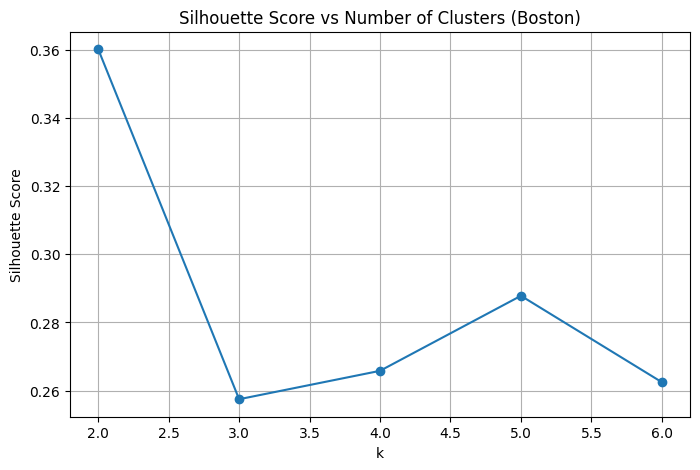

Best k: 2

Mean feature values for each cluster in Boston:
             CRIM         ZN      INDUS      CHAS       NOX        RM  \
Cluster                                                                 
0        0.261172  17.477204   6.885046  0.069909  0.487011  6.455422   
1        9.844730   0.000000  19.039718  0.067797  0.680503  5.967181   

               AGE       DIS        RAD         TAX    PTRATIO           B  \
Cluster                                                                      
0        56.339210  4.756868   4.471125  301.917933  17.837386  386.447872   
1        91.318079  2.007242  18.988701  605.858757  19.604520  301.331695   

             LSTAT  
Cluster             
0         9.468298  
1        18.572768  

Centroid coordinates in the standardized space:
       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.390124  0.262392 -0.620368  0.002912 -0.584675  0.243315 -0.435108   
1  0.725146 -0.487722  1.153113 -0.005412  1.086769 

In [2]:
#problem2
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the Boston Housing dataset from the official source
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# Process the data: Split into features and target variable
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Create a DataFrame
columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]
df = pd.DataFrame(data, columns=columns)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Calculate silhouette scores for different values of k
silhouette_scores = {}
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores[k] = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score for k={k}: {silhouette_scores[k]:.4f}")

# Visualize the silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o')
plt.title('Silhouette Score vs Number of Clusters (Boston)')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Use the best k
best_k = max(silhouette_scores, key=silhouette_scores.get)
print(f"Best k: {best_k}")

# Perform clustering
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

df['Cluster'] = labels

# Calculate the mean feature values for each cluster
mean_values = df.groupby('Cluster').mean()
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df.columns[:-1])

print("\nMean feature values for each cluster in Boston:")
print(mean_values)

print("\nCentroid coordinates in the standardized space:")
print(centroids)


In [3]:
#problem3
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score, completeness_score

# 1. Load the wine dataset
wine_data = load_wine()

# Convert to DataFrame
df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
df['target'] = wine_data.target  # Add the target column (actual class labels)

# 2. Data standardization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop('target', axis=1))  # Remove the target column and standardize only the feature data

# 3. K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)  # Perform clustering and assign a label to each sample

# 4. Calculate homogeneity and completeness
homogeneity = homogeneity_score(df['target'], df['cluster'])
completeness = completeness_score(df['target'], df['cluster'])

# Output the results
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")


Homogeneity: 0.8788432003662366
Completeness: 0.8729636016078731
